In [2]:
from osgeo import gdal
import pandas as pd
import numpy as np
import rasterio
from rasterio.windows import from_bounds
import geopandas as gpd

In [15]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds

def calculate_head(dem):
    # Calculate the range directly, which is the max-min
    head = np.ptp(dem)  # Equivalent to np.max(dem) - np.min(dem)
    return head

def extract_area_of_interest(dem_path, lat, lon, buffer):
    # Calculate bounding box around the point using the buffer
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    # Open DEM file and read the window of interest
    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    return dem

def update_hydropower_plant_data(xlsx_file, dem_path, buffer):
    # Load the Excel file into a DataFrame
    df = pd.read_excel(xlsx_file)

    # Initialize the new column with NaN values
    df['head_calculated'] = pd.NA

    for index, row in df.iterrows():
        dem = extract_area_of_interest(
            dem_path, 
            row['Latitude'], row['Longitude'], buffer
        )
        head = calculate_head(dem)
        df.at[index, 'head_calculated'] = head
    
    # Optionally, save the updated dataframe to a new Excel file
    df.to_excel("updated_hydropower_plants_with_calculated_head_new.xlsx", index=False)

    return df


In [ ]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds

def calculate_head(dem):
    # Calculate the range directly, which is the max-min
    head = np.ptp(dem)  # Equivalent to np.max(dem) - np.min(dem)
    return head

def extract_area_of_interest(dem_path, lat, lon, buffer):
    # Calculate bounding box around the point using the buffer
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    # Open DEM file and read the window of interest
    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    return dem

def update_hydropower_plant_data(xlsx_file, dem_path, buffer):
    # Load the Excel file into a DataFrame
    df = pd.read_excel(xlsx_file)

    # Initialize the new column with NaN values
    df['head_calculated'] = pd.NA

    for index, row in df.iterrows():
        dem = extract_area_of_interest(
            dem_path, 
            row['Latitude'], row['Longitude'], buffer
        )
        head = calculate_head(dem)
        df.at[index, 'head_calculated'] = head
    
    # Optionally, save the updated dataframe to a new Excel file
    df.to_excel("updated_hydropower_plants_with_calculated_head_new.xlsx", index=False)

    return df


In [45]:
# File paths
dem_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\dem_con_asia.tif"
flow_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\flow_laos.tif"
flow_acc_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\flowacc_laos.tif"
xlsx_file = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\hydropower_list.xlsx"

In [20]:
# Run the update function
updated_df = update_hydropower_plant_data(xlsx_file, dem_path, buffer=0.0014) #0.01076923076923077

# Calculate the head difference between actual and calculated values
updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']

# Calculate key statistics
mean_difference = updated_df['head_difference'].mean()
median_difference = updated_df['head_difference'].median()
std_difference = updated_df['head_difference'].std()

# Print the results
print(mean_difference)
print(median_difference)
print(std_difference)

474.06792452830194
387.0
281.5559916808357


In [21]:
updated_df

,SNo,Status,Fuel Type,Latitude,Longitude,capacity,Expected Generation (GWh),total theoretical possible generation (local) GWh,COD,head,head_calculated,head_difference
0,1,Existing,Reservoir,18.530336,102.547646,155.0,1025.0,1357.800,1971.0,212.3,36,176.3
1,2,Existing,Run - Off,15.491752,106.278715,45.0,180.0,394.200,1991.0,482.0,17,465.0
2,3,Existing,Reservoir,18.261088,104.562496,440.0,2691.0,0.438,2013.0,400.0,33,367.0
3,4,Existing,Reservoir,15.059603,106.764106,152.0,450.0,17.520,1999.0,883.0,41,842.0
4,5,Existing,Reservoir,18.437522,102.947408,60.0,215.0,525.600,2000.0,406.1,16,390.1
...,...,...,...,...,...,...,...,...,...,...,...,...
115,197,Expected to be completed after 2030,Reservoir,15.136138,106.593269,81.0,299.0,709.560,NaN,NaN,18,NaN
116,202,Expected to be completed after 2030,Reservoir,20.305807,104.171948,150.0,343.0,1314.000,NaN,NaN,77,NaN
117,250,Expected to be completed after 2030,Reservoir,16.000547,106.961355,330.0,1502.0,2890.800,NaN,NaN,161,NaN
118,266,Expected to be completed after 2030,Run - Off,17.815526,101.538460,660.0,3696.0,87.600,NaN,NaN,0,NaN


## New test 

In [27]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

def calculate_head(dem, dem_transform, plant_lat, plant_lon):
    # Calculate the max elevation in the DEM (approximate upstream)
    max_elevation = np.max(dem)
    
    # Get the row and column corresponding to the plant's coordinates
    row, col = ~dem_transform * (plant_lon, plant_lat)
    
    # Clip row and col to ensure they are within bounds
    row = int(np.clip(row, 0, dem.shape[0] - 1))
    col = int(np.clip(col, 0, dem.shape[1] - 1))
    
    # Get the elevation at the plant's location
    plant_elevation = dem[row, col]

    # Calculate the head as the difference between max elevation and plant elevation
    head = max_elevation - plant_elevation
    return head

def extract_area_of_interest(dem_path, lat, lon, buffer):
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)
        dem_transform = dem_dataset.transform  # Get the transform to map coordinates to array indices

    return dem, dem_transform

def update_hydropower_plant_data(df, dem_path, buffer):
    df['head_calculated'] = pd.NA
    for index, row in df.iterrows():
        dem, dem_transform = extract_area_of_interest(dem_path, row['Latitude'], row['Longitude'], buffer)
        head = calculate_head(dem, dem_transform, row['Latitude'], row['Longitude'])
        df.at[index, 'head_calculated'] = head
    return df

def optimize_buffer_size(df, dem_path, buffer_range):
    results = []
    mean_abs_diffs = []  # Store mean absolute differences for plotting
    mean_diffs = []  # Store mean differences for analysis
    std_diffs = []  # Store standard deviations for analysis

    for buffer in buffer_range:
        updated_df = update_hydropower_plant_data(df.copy(), dem_path, buffer)
        updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']
        
        # Calculate the required metrics
        mean_difference = updated_df['head_difference'].mean()
        mean_absolute_difference = updated_df['head_difference'].abs().mean()
        median_absolute_difference = updated_df['head_difference'].abs().median()
        std_difference = updated_df['head_difference'].std()

        # Calculate combined metric (simple sum)
        combined_metric = mean_absolute_difference + std_difference

        # Store results and metrics for analysis
        results.append({
            'buffer': buffer,
            'mean_difference': mean_difference,
            'mean_absolute_difference': mean_absolute_difference,
            'median_absolute_difference': median_absolute_difference,
            'std_difference': std_difference,
            'combined_metric': combined_metric,
        })

        mean_abs_diffs.append(mean_absolute_difference)
        mean_diffs.append(mean_difference)
        std_diffs.append(std_difference)

    results_df = pd.DataFrame(results)
    optimal_result = results_df.loc[results_df['combined_metric'].idxmin()]
    return optimal_result, updated_df, results_df, mean_abs_diffs, mean_diffs, std_diffs

def optimize_for_fuel_types(xlsx_file, dem_path, buffer_range):
    df = pd.read_excel(xlsx_file)
    reservoir_df = df[df['Fuel Type'] == 'Reservoir']
    runoff_df = df[df['Fuel Type'] == 'Run - Off']

    print("Optimizing for Reservoir plants...")
    optimal_reservoir, updated_reservoir_df, reservoir_results, reservoir_mean_abs_diffs, reservoir_mean_diffs, reservoir_std_diffs = optimize_buffer_size(reservoir_df, dem_path, buffer_range)
    if optimal_reservoir is not None:
        print(f"Optimal Buffer Size for Reservoir: {optimal_reservoir['buffer']}")
        print(f"Mean Difference: {optimal_reservoir['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_reservoir['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_reservoir['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_reservoir['std_difference']}")
        print(f"Combined Metric: {optimal_reservoir['combined_metric']}")

    print("\nOptimizing for Run - Off plants...")
    optimal_runoff, updated_runoff_df, runoff_results, runoff_mean_abs_diffs, runoff_mean_diffs, runoff_std_diffs = optimize_buffer_size(runoff_df, dem_path, buffer_range)
    if optimal_runoff is not None:
        print(f"Optimal Buffer Size for Run - Off: {optimal_runoff['buffer']}")
        print(f"Mean Difference: {optimal_runoff['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_runoff['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_runoff['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_runoff['std_difference']}")
        print(f"Combined Metric: {optimal_runoff['combined_metric']}")

    # Combine the updated data for plotting
    combined_df = pd.concat([updated_reservoir_df, updated_runoff_df])
    
    # Combine results for further analysis
    all_results = pd.concat([reservoir_results, runoff_results])
    
    return combined_df, all_results, reservoir_mean_abs_diffs, runoff_mean_abs_diffs, reservoir_mean_diffs, runoff_mean_diffs, reservoir_std_diffs, runoff_std_diffs

# Example usage
buffer_range = np.linspace(0.00025, 0.010, 101)
combined_df, all_results, reservoir_mean_abs_diffs, runoff_mean_abs_diffs, reservoir_mean_diffs, runoff_mean_diffs, reservoir_std_diffs, runoff_std_diffs = optimize_for_fuel_types(xlsx_file, dem_path, buffer_range)


Optimizing for Reservoir plants...
Optimal Buffer Size for Reservoir: 0.0021025
Mean Difference: 32.3171875
Mean Absolute Difference: 42.8890625
Median Absolute Difference: 36.5
Standard Deviation: 40.55458012671358
Combined Metric: 83.44364262671358

Optimizing for Run - Off plants...
Optimal Buffer Size for Run - Off: 0.0028824999999999996
Mean Difference: 21.2
Mean Absolute Difference: 58.4
Median Absolute Difference: 49.75
Standard Deviation: 84.33523331886484
Combined Metric: 142.73523331886483


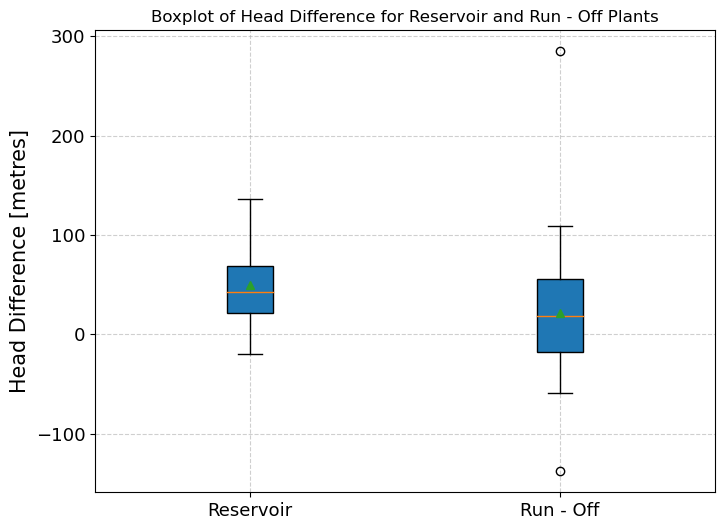

In [57]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

# Calculate head as the difference between max elevation and plant elevation
def calculate_head(dem, dem_transform, plant_lat, plant_lon):
    max_elevation = np.max(dem)
    row, col = ~dem_transform * (plant_lon, plant_lat)
    row = int(np.clip(row, 0, dem.shape[0] - 1))
    col = int(np.clip(col, 0, dem.shape[1] - 1))
    plant_elevation = dem[row, col]
    return max_elevation - plant_elevation

# Extract area of interest around a point
def extract_area_of_interest(dem_path, lat, lon, buffer):
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer
    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)
        dem_transform = dem_dataset.transform
    return dem, dem_transform

# Update hydropower plant data with calculated heads
def update_hydropower_plant_data(df, dem_path, buffer):
    df['head_calculated'] = np.nan
    for index, row in df.iterrows():
        dem, dem_transform = extract_area_of_interest(dem_path, row['Latitude'], row['Longitude'], buffer)
        df.at[index, 'head_calculated'] = calculate_head(dem, dem_transform, row['Latitude'], row['Longitude'])
    df['head_difference'] = df['head'] - df['head_calculated']
    return df

# Find the optimal buffer size for minimizing combined metric
def optimize_buffer_size(df, dem_path, buffer_range):
    best_df = None
    best_metric = float('inf')
    for buffer in buffer_range:
        updated_df = update_hydropower_plant_data(df.copy(), dem_path, buffer)
        combined_metric = updated_df['head_difference'].abs().mean() + updated_df['head_difference'].std()
        if combined_metric < best_metric:
            best_metric = combined_metric
            best_df = updated_df
    return best_df

# Optimize for each fuel type separately and combine results
def optimize_for_fuel_types(xlsx_file, dem_path, buffer_range):
    df = pd.read_excel(xlsx_file)
    reservoir_df = df[df['Fuel Type'] == 'Reservoir'].copy()
    runoff_df = df[df['Fuel Type'] == 'Run - Off'].copy()
    optimized_reservoir_df = optimize_buffer_size(reservoir_df, dem_path, buffer_range)
    optimized_runoff_df = optimize_buffer_size(runoff_df, dem_path, buffer_range)
    return pd.concat([optimized_reservoir_df, optimized_runoff_df])

# Plot a boxplot comparing head differences for Reservoir and Run - Off
def plot_head_difference_boxplots(combined_df):
    # Check for empty or NaN data in head_difference
    if combined_df['head_difference'].isna().all():
        print("No valid data in 'head_difference'. The plot will be empty.")
        return

    reservoir_head_diff = combined_df[combined_df['Fuel Type'] == 'Reservoir']['head_difference'].dropna()
    runoff_head_diff = combined_df[combined_df['Fuel Type'] == 'Run - Off']['head_difference'].dropna()

    # Plot only if there is data to plot
    if not reservoir_head_diff.empty and not runoff_head_diff.empty:
        plt.figure(figsize=(8, 6))
        plt.boxplot([reservoir_head_diff, runoff_head_diff], labels=['Reservoir', 'Run - Off'], patch_artist=True, showmeans=True)
        plt.title('Boxplot of Head Difference for Reservoir and Run - Off Plants')
        plt.ylabel('Head Difference [metres]', fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("No data available for plotting.")

# Example usage
buffer_range = np.linspace(0.00025, 0.010, 101)
combined_df = optimize_for_fuel_types(xlsx_file, dem_path, buffer_range)
plot_head_difference_boxplots(combined_df)


In [59]:
combined_df

,SNo,Status,Fuel Type,Latitude,Longitude,capacity,Expected Generation (GWh),total theoretical possible generation (local) GWh,COD,head,head_calculated,head_difference
0,1,Existing,Reservoir,18.530336,102.547646,155.00,1025.00,1357.80000,1971,45.50,1.0,44.50
2,3,Existing,Reservoir,18.261088,104.562496,440.00,2691.00,0.43800,2013,27.00,4.0,23.00
3,4,Existing,Reservoir,15.059603,106.764106,152.00,450.00,17.52000,1999,79.00,7.0,72.00
4,5,Existing,Reservoir,18.437522,102.947408,60.00,215.00,525.60000,2000,45.50,15.0,30.50
5,6,Existing,Reservoir,18.349700,102.765261,40.00,150.00,350.40000,2009,17.00,5.0,12.00
7,8,Existing,Reservoir,18.793567,102.116356,100.00,435.00,876.00000,2010,73.00,60.0,13.00
8,9,Existing,Reservoir,17.997514,104.952542,1080.00,6000.00,659.41776,2010,39.00,1.0,38.00
9,10,Existing,Reservoir,18.751194,102.775597,615.00,2300.00,5000.00000,2012,181.00,65.0,116.00
10,11,Existing,Reservoir,19.356814,102.621214,120.00,507.00,1051.20000,2012,104.00,124.0,-20.00
13,18,Existing,Reservoir,19.299906,103.352253,44.00,152.30,385.44000,2014,30.00,5.0,25.00


# Existing approach 

In [61]:
from osgeo import gdal
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

def calculate_head(dem):
    head = np.ptp(dem)  # Equivalent to np.max(dem) - np.min(dem)
    return head

def extract_area_of_interest(dem_path, lat, lon, buffer):
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    return dem

def update_hydropower_plant_data(df, dem_path, buffer):
    df['head_calculated'] = pd.NA
    for index, row in df.iterrows():
        dem = extract_area_of_interest(dem_path, row['Latitude'], row['Longitude'], buffer)
        head = calculate_head(dem)
        df.at[index, 'head_calculated'] = head
    return df

def optimize_buffer_size(df, dem_path, buffer_range):
    results = []
    mean_abs_diffs = []  # Store mean absolute differences for plotting
    mean_diffs = []  # Store mean differences for analysis
    std_diffs = []  # Store standard deviations for analysis

    for buffer in buffer_range:
        updated_df = update_hydropower_plant_data(df.copy(), dem_path, buffer)
        updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']
        
        # Calculate the required metrics
        mean_difference = updated_df['head_difference'].mean()
        mean_absolute_difference = updated_df['head_difference'].abs().mean()
        median_absolute_difference = updated_df['head_difference'].abs().median()
        std_difference = updated_df['head_difference'].std()

        # Calculate combined metric (simple sum)
        combined_metric = mean_absolute_difference + std_difference

        # Store results and metrics for analysis
        results.append({
            'buffer': buffer,
            'mean_difference': mean_difference,
            'mean_absolute_difference': mean_absolute_difference,
            'median_absolute_difference': median_absolute_difference,
            'std_difference': std_difference,
            'combined_metric': combined_metric,
        })

        mean_abs_diffs.append(mean_absolute_difference)
        mean_diffs.append(mean_difference)
        std_diffs.append(std_difference)

    results_df = pd.DataFrame(results)
    optimal_result = results_df.loc[results_df['combined_metric'].idxmin()]
    return optimal_result, updated_df, results_df, mean_abs_diffs, mean_diffs, std_diffs

def optimize_for_fuel_types(xlsx_file, dem_path, buffer_range):
    df = pd.read_excel(xlsx_file)
    reservoir_df = df[df['Fuel Type'] == 'Reservoir']
    runoff_df = df[df['Fuel Type'] == 'Run - Off']

    print("Optimizing for Reservoir plants...")
    optimal_reservoir, updated_reservoir_df, reservoir_results, reservoir_mean_abs_diffs, reservoir_mean_diffs, reservoir_std_diffs = optimize_buffer_size(reservoir_df, dem_path, buffer_range)
    if optimal_reservoir is not None:
        print(f"Optimal Buffer Size for Reservoir: {optimal_reservoir['buffer']}")
        print(f"Mean Difference: {optimal_reservoir['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_reservoir['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_reservoir['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_reservoir['std_difference']}")
        print(f"Combined Metric: {optimal_reservoir['combined_metric']}")

    print("\nOptimizing for Run - Off plants...")
    optimal_runoff, updated_runoff_df, runoff_results, runoff_mean_abs_diffs, runoff_mean_diffs, runoff_std_diffs = optimize_buffer_size(runoff_df, dem_path, buffer_range)
    if optimal_runoff is not None:
        print(f"Optimal Buffer Size for Run - Off: {optimal_runoff['buffer']}")
        print(f"Mean Difference: {optimal_runoff['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_runoff['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_runoff['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_runoff['std_difference']}")
        print(f"Combined Metric: {optimal_runoff['combined_metric']}")

    # Combine the updated data for plotting
    combined_df = pd.concat([updated_reservoir_df, updated_runoff_df])
    
    # Combine results for further analysis
    all_results = pd.concat([reservoir_results, runoff_results])
    
    return combined_df, all_results, reservoir_mean_abs_diffs, runoff_mean_abs_diffs, reservoir_mean_diffs, runoff_mean_diffs, reservoir_std_diffs, runoff_std_diffs

# Example usage
buffer_range = np.linspace(0.00025, 0.010, 101)
combined_df, all_results, reservoir_mean_abs_diffs, runoff_mean_abs_diffs, reservoir_mean_diffs, runoff_mean_diffs, reservoir_std_diffs, runoff_std_diffs = optimize_for_fuel_types(xlsx_file, dem_path, buffer_range)




Optimizing for Reservoir plants...
Optimal Buffer Size for Reservoir: 0.0019075
Mean Difference: -6.672580645161289
Mean Absolute Difference: 29.14354838709677
Median Absolute Difference: 25.0
Standard Deviation: 36.60076920573682
Combined Metric: 65.7443175928336

Optimizing for Run - Off plants...
Optimal Buffer Size for Run - Off: 0.0011275
Mean Difference: 28.55
Mean Absolute Difference: 51.3
Median Absolute Difference: 29.25
Standard Deviation: 86.34659350852421
Combined Metric: 137.6465935085242


In [31]:
all_results.to_excel("all_results.xlsx", index=False)

In [37]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

# Function to calculate the head (elevation difference)
def calculate_head(dem):
    head = np.ptp(dem)  # Equivalent to np.max(dem) - np.min(dem)
    return head

# Function to extract the area of interest around a point
def extract_area_of_interest(dem_path, lat, lon, buffer):
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    return dem

# Function to update hydropower plant data with calculated heads
def update_hydropower_plant_data(df, dem_path, buffer):
    df['head_calculated'] = pd.NA
    for index, row in df.iterrows():
        dem = extract_area_of_interest(dem_path, row['Latitude'], row['Longitude'], buffer)
        head = calculate_head(dem)
        df.at[index, 'head_calculated'] = head
    return df

# Function to optimize buffer size by minimizing a combined metric
def optimize_buffer_size(df, dem_path, buffer_range):
    results = []
    mean_abs_diffs = []  # Store mean absolute differences for plotting
    mean_diffs = []  # Store mean differences for analysis
    std_diffs = []  # Store standard deviations for analysis

    for buffer in buffer_range:
        updated_df = update_hydropower_plant_data(df.copy(), dem_path, buffer)
        updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']
        
        # Calculate the required metrics
        mean_difference = updated_df['head_difference'].mean()
        mean_absolute_difference = updated_df['head_difference'].abs().mean()
        median_absolute_difference = updated_df['head_difference'].abs().median()
        STD_difference = updated_df['head_difference'].std()

        # Calculate combined metric (simple sum)
        combined_metric = mean_absolute_difference + STD_difference

        # Store results and metrics for analysis
        results.append({
            'buffer': buffer,
            'mean_difference': mean_difference,
            'mean_absolute_difference': mean_absolute_difference,
            'median_absolute_difference': median_absolute_difference,
            'STD_difference': STD_difference,
            'combined_metric': combined_metric,
        })

        mean_abs_diffs.append(mean_absolute_difference)
        mean_diffs.append(mean_difference)
        std_diffs.append(STD_difference)

    results_df = pd.DataFrame(results)
    optimal_result = results_df.loc[results_df['combined_metric'].idxmin()]
    return optimal_result, updated_df, results_df, mean_abs_diffs, mean_diffs, std_diffs

# Function to optimize for each fuel type separately
def optimize_for_fuel_types(xlsx_file, dem_path, buffer_range):
    df = pd.read_excel(xlsx_file)
    reservoir_df = df[df['Fuel Type'] == 'Reservoir']
    runoff_df = df[df['Fuel Type'] == 'Run - Off']

    # Optimize for Reservoir
    print("Optimizing for Reservoir plants...")
    optimal_reservoir, updated_reservoir_df, reservoir_results, reservoir_mean_abs_diffs, reservoir_mean_diffs, reservoir_std_diffs = optimize_buffer_size(reservoir_df, dem_path, buffer_range)
    if optimal_reservoir is not None:
        print(f"Optimal Buffer Size for Reservoir: {optimal_reservoir['buffer']}")
        print(f"Mean Difference: {optimal_reservoir['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_reservoir['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_reservoir['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_reservoir['STD_difference']}")
        print(f"Combined Metric: {optimal_reservoir['combined_metric']}")

    # Optimize for Run-Off
    print("\nOptimizing for Run - Off plants...")
    optimal_runoff, updated_runoff_df, runoff_results, runoff_mean_abs_diffs, runoff_mean_diffs, runoff_std_diffs = optimize_buffer_size(runoff_df, dem_path, buffer_range)
    if optimal_runoff is not None:
        print(f"Optimal Buffer Size for Run - Off: {optimal_runoff['buffer']}")
        print(f"Mean Difference: {optimal_runoff['mean_difference']}")
        print(f"Mean Absolute Difference: {optimal_runoff['mean_absolute_difference']}")
        print(f"Median Absolute Difference: {optimal_runoff['median_absolute_difference']}")
        print(f"Standard Deviation: {optimal_runoff['STD_difference']}")
        print(f"Combined Metric: {optimal_runoff['combined_metric']}")

    # Combine the updated data for plotting
    combined_df = pd.concat([updated_reservoir_df, updated_runoff_df])
    
    # Return the results for further analysis and plotting
    return reservoir_results, runoff_results 

# Example usage
buffer_range = np.linspace(0.005, 0.015, 101)
reservoir_results, runoff_results = optimize_for_fuel_types(xlsx_file, dem_path, buffer_range)


Optimizing for Reservoir plants...
Optimal Buffer Size for Reservoir: 0.0107
Mean Difference: 225.05945945945942
Mean Absolute Difference: 283.3405405405405
Median Absolute Difference: 178.0
Standard Deviation: 329.34725464795383
Combined Metric: 612.6877951884943

Optimizing for Run - Off plants...
Optimal Buffer Size for Run - Off: 0.0093
Mean Difference: 132.9625
Mean Absolute Difference: 176.33749999999998
Median Absolute Difference: 67.85
Standard Deviation: 260.7695991355843
Combined Metric: 437.1070991355843


In [51]:
ylim = [min(reservoir_results.min().min(), runoff_results.min().min()), 
        max(reservoir_results.max().max(), runoff_results.max().max())]
ylim

[-2.2875000000000005, 681.8107696812228]

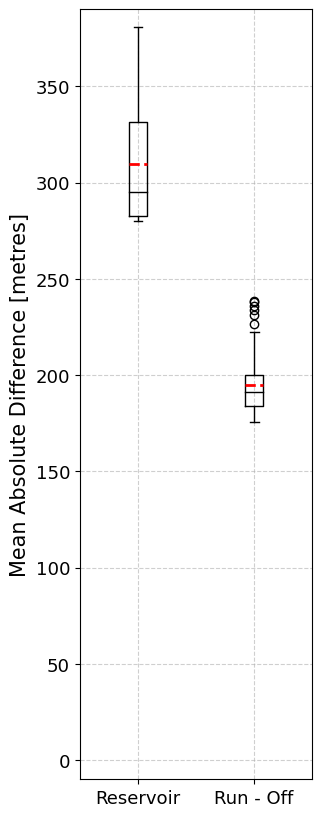

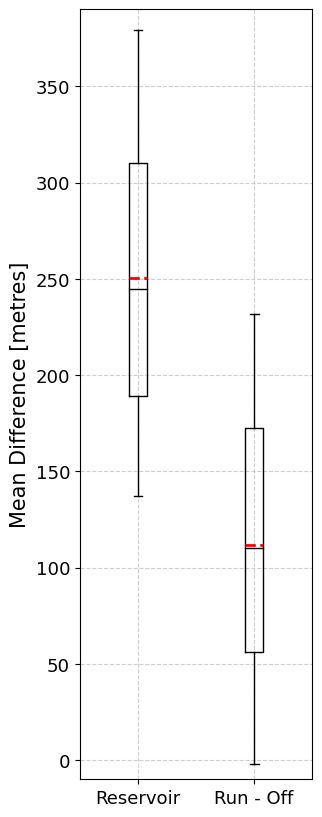

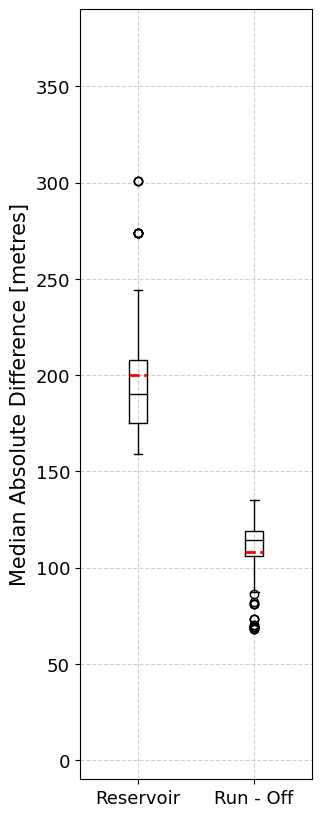

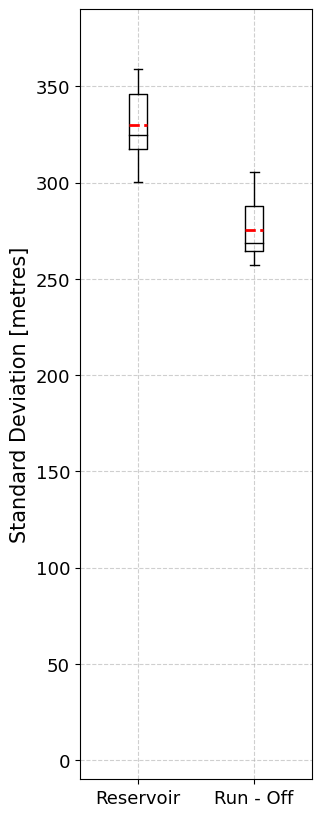

In [54]:
import matplotlib.pyplot as plt

# Function to plot a simplified boxplot for a specific metric, including the mean
def plot_metric_boxplot(reservoir_results, runoff_results, metric_name, ylim=None):
    # Extract the relevant metric data for boxplots
    reservoir_metric = reservoir_results[metric_name]
    runoff_metric = runoff_results[metric_name]

    # Format the metric name for the plot, including handling 'STD_difference' separately
    if metric_name == 'STD_difference':
        formatted_metric_name = 'Standard Deviation'
    else:
        formatted_metric_name = metric_name.replace('_', ' ').title()

    # Add "[metres]" to the end of the formatted metric name
    formatted_metric_name += ' [metres]'

    # Create the boxplot
    plt.figure(figsize=(3, 10))
    boxprops = dict(color='black')
    medianprops = dict(color='black')
    whiskerprops = dict(color='black')
    capprops = dict(color='black')

    plt.boxplot(
        [reservoir_metric, runoff_metric], 
        labels=['Reservoir', 'Run - Off'], 
        boxprops=boxprops, 
        medianprops=medianprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        patch_artist=False,
        showmeans=True,
        meanline=True,
        meanprops=dict(color='red', linewidth=2)
    )

    # Set y-axis label and font sizes
    plt.ylabel(formatted_metric_name, fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    # Apply the y-axis limit if provided
    if ylim is not None:
        plt.ylim(ylim)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Determine a common y-axis limit based on the data
# ylim = [min(reservoir_results.min().min(), runoff_results.min().min()), 
#         max(reservoir_results.max().max(), runoff_results.max().max())]

ylim = [-10, 390]
# Example usage with common y-axis limits
plot_metric_boxplot(reservoir_results, runoff_results, 'mean_absolute_difference', ylim)
plot_metric_boxplot(reservoir_results, runoff_results, 'mean_difference', ylim)
plot_metric_boxplot(reservoir_results, runoff_results, 'median_absolute_difference', ylim)
plot_metric_boxplot(reservoir_results, runoff_results, 'STD_difference', ylim)


In [55]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

# Function to calculate the head (elevation difference)
def calculate_head(dem):
    head = np.ptp(dem)  # Equivalent to np.max(dem) - np.min(dem)
    return head

# Function to extract the area of interest around a point
def extract_area_of_interest(dem_path, lat, lon, buffer):
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer

    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    return dem

# Function to update hydropower plant data with calculated heads
def update_hydropower_plant_data(df, dem_path, buffer):
    df['head_calculated'] = pd.NA
    for index, row in df.iterrows():
        dem = extract_area_of_interest(dem_path, row['Latitude'], row['Longitude'], buffer)
        head = calculate_head(dem)
        df.at[index, 'head_calculated'] = head
    return df

# Function to optimize buffer size by minimizing a combined metric
def optimize_buffer_size(df, dem_path, buffer_range):
    results = []

    for buffer in buffer_range:
        updated_df = update_hydropower_plant_data(df.copy(), dem_path, buffer)
        updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']
        
        # Calculate the required metrics
        mean_absolute_difference = updated_df['head_difference'].abs().mean()
        std_difference = updated_df['head_difference'].std()

        # Calculate combined metric (simple sum)
        combined_metric = mean_absolute_difference + std_difference

        # Store results and metrics for analysis
        results.append({
            'buffer': buffer,
            'mean_absolute_difference': mean_absolute_difference,
            'std_difference': std_difference,
            'combined_metric': combined_metric,
            'updated_df': updated_df
        })

    results_df = pd.DataFrame(results)
    optimal_result = results_df.loc[results_df['combined_metric'].idxmin()]
    return optimal_result

# Function to optimize for each fuel type separately
def optimize_for_fuel_types(xlsx_file, dem_path, buffer_range):
    df = pd.read_excel(xlsx_file)
    reservoir_df = df[df['Fuel Type'] == 'Reservoir']
    runoff_df = df[df['Fuel Type'] == 'Run - Off']

    # Optimize for Reservoir
    print("Optimizing for Reservoir plants...")
    optimal_reservoir = optimize_buffer_size(reservoir_df, dem_path, buffer_range)
    reservoir_results = optimal_reservoir['updated_df']

    # Optimize for Run-Off
    print("\nOptimizing for Run - Off plants...")
    optimal_runoff = optimize_buffer_size(runoff_df, dem_path, buffer_range)
    runoff_results = optimal_runoff['updated_df']

    return df, reservoir_results, runoff_results

# Function to fill missing head values using optimized results
def fill_missing_head_values(df, reservoir_results, runoff_results):
    for index, row in df.iterrows():
        if pd.isna(row['head']):
            fuel_type = row['Fuel Type']
            if fuel_type == 'Reservoir':
                df.at[index, 'head'] = reservoir_results.loc[index, 'head_calculated']
            elif fuel_type == 'Run - Off':
                df.at[index, 'head'] = runoff_results.loc[index, 'head_calculated']
    return df



In [56]:

buffer_range = np.linspace(0.005, 0.015, 101)

# Run the optimization
df, reservoir_results, runoff_results = optimize_for_fuel_types(xlsx_file, dem_path, buffer_range)

# Fill missing head values
filled_df = fill_missing_head_values(df, reservoir_results, runoff_results)

# Save the updated DataFrame to a new Excel file
filled_df.to_excel("updated_hydropower_plants_with_filled_heads.xlsx", index=False)

print("Missing values in the 'head' column have been filled and saved to 'updated_hydropower_plants_with_filled_heads.xlsx'.")


Optimizing for Reservoir plants...

Optimizing for Run - Off plants...
Missing values in the 'head' column have been filled and saved to 'updated_hydropower_plants_with_filled_heads.xlsx'.


# Test on 32000 m Head

In [ ]:
df = updated_df.copy()
for index, row in df.iterrows():
    if df.at[index, 'head_calculated'] >= 32000:  # Check only problematic entries
        dem, flow, flow_acc = extract_area_of_interest(
            dem_path, flow_path, flow_acc_path, 
            row['Latitude'], row['Longitude']
        )
        print(f"DEM values for index {index}:")
        print(dem)
        # Inspect min and max values
        print(f"Max elevation: {np.max(dem)}")
        print(f"Min elevation: {np.min(dem)}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for index, row in df.iterrows():
    if df.at[index, 'head_calculated'] >= 32000:  # Check only problematic entries
        dem, flow, flow_acc = extract_area_of_interest(
            dem_path, flow_path, flow_acc_path, 
            row['Latitude'], row['Longitude']
        )
        plt.imshow(dem, cmap='terrain')
        plt.colorbar(label='Elevation (m)')
        plt.title(f"DEM around index {index}")
        plt.show()


# Deviation

In [114]:
df = updated_df.copy()
df['head_difference'] = df['head'] - df['head_calculated']
head_difference_std = df['head_difference'].std()

# Print the result
print(f"Standard Deviation of the difference between 'head' and 'head_calculated': {head_difference_std}")

Standard Deviation of the difference between 'head' and 'head_calculated': 339.8763907049835


In [140]:
# Calculate the difference between head and head_calculated
df['head_difference'] = df['head'] - df['head_calculated']

# Calculate key statistics
mean_difference = df['head_difference'].mean()
median_difference = df['head_difference'].median()
print(mean_difference)
print(median_difference)

93.08070175438596
22.0


In [205]:
updated_df = update_hydropower_plant_data(xlsx_file, dem_path, flow_path, flow_acc_path, buffer=0.01)

# Calculate the difference between head and head_calculated
df['head_difference'] = df['head'] - df['head_calculated']

# Calculate key statistics
mean_difference = df['head_difference'].mean()
median_difference = df['head_difference'].median()
print(mean_difference)
print(median_difference)

384.6947368421053
329.0


In [102]:
updated_df.to_excel("updated_hydropower_plants_with_calculated_head.xlsx", index=False)


# Additional approachs

In [157]:
import pandas as pd
from sklearn.cluster import KMeans

# Load the spreadsheet
file_path = 'updated_hydropower_plants_with_calculated_head.xlsx'
df = pd.read_excel(file_path)

# Step 1: Perform clustering (using k-means for simplicity)
cluster_data = df[['Expected Generation (GWh)', 'head_calculated']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)  # Number of clusters can be adjusted
df['cluster'] = kmeans.fit_predict(cluster_data)

# Step 2: Calculate cluster-specific scaling factors
cluster_scaling_factors = df.groupby('cluster')['Expected Generation (GWh)'].mean() / df.groupby('cluster')['head_calculated'].mean()

# Step 3: Adjust head_calculated within each cluster
df['head_calculated_adjusted'] = df['head_calculated']
for cluster in cluster_scaling_factors.index:
    scaling_factor = cluster_scaling_factors[cluster]
    df.loc[df['cluster'] == cluster, 'head_calculated_adjusted'] *= scaling_factor

# Save the updated DataFrame back to a new Excel file
output_file_path = 'updated_hydropower_plants_cluster_adjusted.xlsx'
df.to_excel(output_file_path, index=False)

output_file_path


c:\Users\lukas\anaconda3\envs\geoh2_master\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\lukas\AppData\Local\Temp\ipykernel_19428\2868376886.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 888.40723404 1432.91489362 2337.69829787 1387.88042553 2014.26893617
 1768.62638298 2120.71404255  356.18170213  429.87446809 2505.55404255
 1670.3693617  2001.98680851 3213.82340426]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['cluster'] == cluster, 'head_calculated_adjusted'] *= scaling_factor


'updated_hydropower_plants_cluster_adjusted.xlsx'

## Simple Example

In [94]:

def extract_area_of_interest(dem_path, flow_path, flow_acc_path, lat, lon, buffer=0.01):
    # Define the bounds around the point using the buffer
    minx, miny = lon - buffer, lat - buffer
    maxx, maxy = lon + buffer, lat + buffer
    
    # Open DEM file and read the window of interest
    with rasterio.open(dem_path) as dem_dataset:
        window = from_bounds(minx, miny, maxx, maxy, dem_dataset.transform)
        dem = dem_dataset.read(1, window=window)

    # Open Flow file and read the window of interest
    with rasterio.open(flow_path) as flow_dataset:
        flow = flow_dataset.read(1, window=window)

    # Open Flow Accumulation file and read the window of interest
    with rasterio.open(flow_acc_path) as flow_acc_dataset:
        flow_acc = flow_acc_dataset.read(1, window=window)
    
    return dem, flow, flow_acc

def calculate_head(dem, flow, flow_acc):
    # Simple approach to calculate the head
    upstream_elevation = np.max(dem)
    downstream_elevation = np.min(dem)
    head = upstream_elevation - downstream_elevation
    return head

In [95]:
# Example single entry (replace with actual values)
latitude = 18.530336  # example latitude
longitude = 102.547646  # example longitude
head = np.nan  # head is missing

In [96]:
from rasterio.windows import from_bounds
from shapely.geometry import box
dem, flow, flow_acc = extract_area_of_interest(dem_path, flow_path, flow_acc_path, latitude, longitude)


In [17]:
calculated_head = calculate_head(dem, flow, flow_acc)
print(f"Calculated head: {calculated_head}")

Calculated head: 217


In [19]:
latitude = 15.491752
longitude = 106.278715
head = np.nan
dem, flow, flow_acc = extract_area_of_interest(dem_path, flow_path, flow_acc_path, latitude, longitude)
calculated_head = calculate_head(dem, flow, flow_acc)
print(f"Calculated head: {calculated_head}")

Calculated head: 326


## Complicated head calculation, based on hydronetworks

In [2]:
# File paths
dem_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\dem_con_asia.tif"
flow_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\flow_asia.tif"
flow_acc_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\as_acc_3s.tif"
xlsx_file = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\hydropower_list.xlsx"

In [3]:
# Load hydropower plant data
df = pd.read_excel(xlsx_file)

# Initialize the LocalHydroNetwork class
hydro_calculator = LocalHydroNetwork(dem_path, flow_path, flow_acc_path)

updated_df = hydro_calculator.process_hydropower_plants(df)

updated_df['head_difference'] = updated_df['head'] - updated_df['head_calculated']

# Calculate key statistics
mean_difference = updated_df['head_difference'].mean()
median_difference = updated_df['head_difference'].median()
print(mean_difference)
print(median_difference)

NameError: name 'LocalHydroNetwork' is not defined

In [74]:
# from osgeo import gdal
import numpy as np
import pandas as pd
import rasterio
from shapely.geometry import Point, box
from pyproj import CRS, Proj
import geopandas as gpd

wgs84 = CRS("EPSG:4326")
merc = CRS("EPSG:3395")
merc_pro = Proj("EPSG:3395")

class LocalHydroNetwork:
    def __init__(self, dem_path, flow_path, flow_acc_path):
        self.dem = rasterio.open(dem_path)
        self.flow = rasterio.open(flow_path)
        self.flow_acc = rasterio.open(flow_acc_path)

    def create_local_network(self, point, buffer=0.005):
        """
        Create a local network around a given point.
        """
        minx, miny = point.x - buffer, point.y - buffer
        maxx, maxy = point.x + buffer, point.y + buffer

        window = rasterio.windows.from_bounds(minx, miny, maxx, maxy, self.dem.transform)
        dem_local = self.dem.read(1, window=window)
        flow_local = self.flow.read(1, window=window)
        flow_acc_local = self.flow_acc.read(1, window=window)

        transform = rasterio.windows.transform(window, self.dem.transform)

        # Simplified network: we only deal with the local area
        nodes, arcs = self._extract_nodes_arcs(dem_local, flow_local, flow_acc_local, transform)
        return nodes, arcs

    def _extract_nodes_arcs(self, dem_local, flow_local, flow_acc_local, transform):
        """
        Extract nodes and arcs from the local DEM and flow data.
        """
        nodes = []
        arcs = []
        height, width = dem_local.shape
        node_index_map = {}

        for i in range(height):
            for j in range(width):
                x, y = transform * (j, i)
                elevation = dem_local[i, j]
                flow_dir = flow_local[i, j]
                flow_acc = flow_acc_local[i, j]

                # Create or retrieve the current node
                current_node = (i, j)
                if current_node not in node_index_map:
                    node_id = len(nodes)
                    node = {
                        'id': node_id,
                        'x': x,
                        'y': y,
                        'elevation': elevation,
                        'flow_acc': flow_acc,
                        'arcs': []
                    }
                    nodes.append(node)
                    node_index_map[current_node] = node_id
                else:
                    node_id = node_index_map[current_node]

                if flow_dir > 0:
                    next_i, next_j = self._flow_direction_to_indices(i, j, flow_dir)
                    if 0 <= next_i < height and 0 <= next_j < width:
                        next_node = (next_i, next_j)
                        if next_node not in node_index_map:
                            next_node_id = len(nodes)
                            next_x, next_y = transform * (next_j, next_i)
                            next_elevation = dem_local[next_i, next_j]
                            next_flow_acc = flow_acc_local[next_i, next_j]

                            next_node_data = {
                                'id': next_node_id,
                                'x': next_x,
                                'y': next_y,
                                'elevation': next_elevation,
                                'flow_acc': next_flow_acc,
                                'arcs': []
                            }
                            nodes.append(next_node_data)
                            node_index_map[next_node] = next_node_id
                        else:
                            next_node_id = node_index_map[next_node]

                        arc = {
                            'start_node': node_id,
                            'end_node': next_node_id,
                            'length': np.hypot(next_i - i, next_j - j)
                        }
                        nodes[node_id]['arcs'].append(arc)
                        arcs.append(arc)

        return nodes, arcs


    def _flow_direction_to_indices(self, i, j, direction):
        """
        Convert flow direction to the next cell indices, similar to how D8 algorithm works.
        """
        if direction == 1:  # East
            return i, j + 1
        elif direction == 2:  # Southeast
            return i + 1, j + 1
        elif direction == 4:  # South
            return i + 1, j
        elif direction == 8:  # Southwest
            return i + 1, j - 1
        elif direction == 16:  # West
            return i, j - 1
        elif direction == 32:  # Northwest
            return i - 1, j - 1
        elif direction == 64:  # North
            return i - 1, j
        elif direction == 128:  # Northeast
            return i - 1, j + 1
        else:
            return i, j  # No direction

    def calculate_head(self, nodes, arcs):
        """
        Calculate head based on the local network.
        """
        max_head = 0
        for arc in arcs:
            start_node = nodes[arc['start_node']]
            end_node = nodes[arc['end_node']]
            head = start_node['elevation'] - end_node['elevation']
            if head > max_head:
                max_head = head
        return max_head

    def process_hydropower_plants(self, df):
        df['head_calculated'] = pd.NA
        for index, row in df.iterrows():
            point = Point(row['Longitude'], row['Latitude'])
            nodes, arcs = self.create_local_network(point)
            head = self.calculate_head(nodes, arcs)
            df.at[index, 'head_calculated'] = head
        
        return df


In [75]:
# File paths
dem_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\dem_con_asia.tif"
flow_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\flow_asia.tif"
flow_acc_path = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\Archive\\as_acc_3s.tif"
xlsx_file = "C:\\Users\\lukas\\OneDrive - Imperial College London\\0_Thesis\\0relevant_repositories\\hydronetworks\\data_laos\\hydropower_list.xlsx"

In [76]:

# Load hydropower plant data
df = pd.read_excel(xlsx_file)

# Initialize the LocalHydroNetwork class
hydro_calculator = LocalHydroNetwork(dem_path, flow_path, flow_acc_path)


In [77]:

# Process the hydropower plants DataFrame to calculate the head
updated_df = hydro_calculator.process_hydropower_plants(df)

# Display the updated DataFrame
updated_df.dropna(subset=['head'])


,SNo,Status,Fuel Type,Latitude,Longitude,capacity,Expected Generation (GWh),total theoretical possible generation (local) GWh,COD,head,head_calculated
0,1,Existing,Reservoir,18.530336,102.547646,155.00,1025.00,1357.80000,1971.0,45.50,56
1,2,Existing,Run - Off,15.491752,106.278715,45.00,180.00,394.20000,1991.0,10.00,58
2,3,Existing,Reservoir,18.261088,104.562496,440.00,2691.00,0.43800,2013.0,27.00,46
3,4,Existing,Reservoir,15.059603,106.764106,152.00,450.00,17.52000,1999.0,79.00,35
4,5,Existing,Reservoir,18.437522,102.947408,60.00,215.00,525.60000,2000.0,45.50,28
5,6,Existing,Reservoir,18.349700,102.765261,40.00,150.00,350.40000,2009.0,17.00,64
6,7,Existing,Run - Off,15.403767,106.280347,76.00,309.00,665.76000,2009.0,12.00,18
7,8,Existing,Reservoir,18.793567,102.116356,100.00,435.00,876.00000,2010.0,73.00,76
8,9,Existing,Reservoir,17.997514,104.952542,1080.00,6000.00,659.41776,2010.0,39.00,53
9,10,Existing,Reservoir,18.751194,102.775597,615.00,2300.00,5000.00000,2012.0,181.00,92


In [78]:
# Calculate the difference between head and head_calculated
df['head_difference'] = df['head'] - df['head_calculated']

# Calculate key statistics
mean_difference = df['head_difference'].abs().mean()
median_difference = df['head_difference'].median()
print(mean_difference)
print(median_difference)

36.739423076923075
-1.0


In [93]:

# Filter the DataFrame to include only rows where 'head' is not NaN and 'Fuel Type' is "Run - Off"
df_filtered = df[(df['head'].notna()) & (df['Fuel Type'] == "Run - Off")]

# Calculate the difference between 'head' and 'head_calculated' for the filtered DataFrame
df_filtered['head_difference'] = df_filtered['head'] - df_filtered['head_calculated']

# Calculate the standard deviation of the difference
head_difference_std = df_filtered['head_difference'].std()

# Print the result
print(f"Standard Deviation of the difference between 'head' and 'head_calculated' for 'Run - Off': {head_difference_std}")

Standard Deviation of the difference between 'head' and 'head_calculated' for 'Run - Off': 251.58966299575144


C:\Users\lukas\AppData\Local\Temp\ipykernel_19428\3939350963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['head_difference'] = df_filtered['head'] - df_filtered['head_calculated']


In [ ]:

# Optionally, save the updated DataFrame to a new Excel file
updated_df.to_excel("updated_hydropower_plants_with_calculated_head_NEW.xlsx", index=False)

In [81]:
import numpy as np
import pandas as pd
import rasterio
from shapely.geometry import Point
from pyproj import CRS, Proj
import geopandas as gpd

wgs84 = CRS("EPSG:4326")
merc = CRS("EPSG:3395")
merc_pro = Proj("EPSG:3395")

class LocalHydroNetwork:
    def __init__(self, dem_path, flow_path, flow_acc_path):
        self.dem = rasterio.open(dem_path)
        self.flow = rasterio.open(flow_path)
        self.flow_acc = rasterio.open(flow_acc_path)

    def create_local_network(self, point, buffer=0.005):
        """
        Create a local network around a given point.
        """
        minx, miny = point.x - buffer, point.y - buffer
        maxx, maxy = point.x + buffer, point.y + buffer

        window = rasterio.windows.from_bounds(minx, miny, maxx, maxy, self.dem.transform)
        dem_local = self.dem.read(1, window=window)
        flow_local = self.flow.read(1, window=window)
        flow_acc_local = self.flow_acc.read(1, window=window)

        transform = rasterio.windows.transform(window, self.dem.transform)

        nodes, arcs = self._extract_nodes_arcs(dem_local, flow_local, flow_acc_local, transform)
        return nodes, arcs

    def _extract_nodes_arcs(self, dem_local, flow_local, flow_acc_local, transform):
        """
        Extract nodes and arcs from the local DEM and flow data.
        """
        nodes = []
        arcs = []
        height, width = dem_local.shape
        node_index_map = {}

        for i in range(height):
            for j in range(width):
                x, y = transform * (j, i)
                elevation = dem_local[i, j]
                flow_dir = flow_local[i, j]
                flow_acc = flow_acc_local[i, j]

                current_node = (i, j)
                if current_node not in node_index_map:
                    node_id = len(nodes)
                    node = {
                        'id': node_id,
                        'x': x,
                        'y': y,
                        'elevation': elevation,
                        'flow_acc': flow_acc,
                        'arcs': []
                    }
                    nodes.append(node)
                    node_index_map[current_node] = node_id
                else:
                    node_id = node_index_map[current_node]

                if flow_dir > 0:
                    next_i, next_j = self._flow_direction_to_indices(i, j, flow_dir)
                    if 0 <= next_i < height and 0 <= next_j < width:
                        next_node = (next_i, next_j)
                        if next_node not in node_index_map:
                            next_node_id = len(nodes)
                            next_x, next_y = transform * (next_j, next_i)
                            next_elevation = dem_local[next_i, next_j]
                            next_flow_acc = flow_acc_local[next_i, next_j]

                            next_node_data = {
                                'id': next_node_id,
                                'x': next_x,
                                'y': next_y,
                                'elevation': next_elevation,
                                'flow_acc': next_flow_acc,
                                'arcs': []
                            }
                            nodes.append(next_node_data)
                            node_index_map[next_node] = next_node_id
                        else:
                            next_node_id = node_index_map[next_node]

                        arc = {
                            'start_node': node_id,
                            'end_node': next_node_id,
                            'length': np.hypot(next_i - i, next_j - j)
                        }
                        nodes[node_id]['arcs'].append(arc)
                        arcs.append(arc)

        return nodes, arcs

    def _flow_direction_to_indices(self, i, j, direction):
        """
        Convert flow direction to the next cell indices.
        """
        if direction == 1:  # East
            return i, j + 1
        elif direction == 2:  # Southeast
            return i + 1, j + 1
        elif direction == 4:  # South
            return i + 1, j
        elif direction == 8:  # Southwest
            return i + 1, j - 1
        elif direction == 16:  # West
            return i, j - 1
        elif direction == 32:  # Northwest
            return i - 1, j - 1
        elif direction == 64:  # North
            return i - 1, j
        elif direction == 128:  # Northeast
            return i - 1, j + 1
        else:
            return i, j  # No direction

    def calculate_head(self, nodes, arcs):
        """
        Calculate head based on the local network.
        """
        max_head = 0
        for arc in arcs:
            start_node = nodes[arc['start_node']]
            end_node = nodes[arc['end_node']]
            head = start_node['elevation'] - end_node['elevation']
            if head > max_head:
                max_head = head
        return max_head

    def process_hydropower_plants(self, df, buffer):
        df['head_calculated'] = pd.NA
        for index, row in df.iterrows():
            point = Point(row['Longitude'], row['Latitude'])
            nodes, arcs = self.create_local_network(point, buffer)
            head = self.calculate_head(nodes, arcs)
            df.at[index, 'head_calculated'] = head
        return df

    def optimize_buffer(self, df, buffer_range):
        best_mae = float('inf')
        best_std = float('inf')
        best_buffer = None
        
        for buffer in buffer_range:
            df_processed = self.process_hydropower_plants(df.copy(), buffer)
            df_processed['head_difference'] = df_processed['head'] - df_processed['head_calculated']
            mae = df_processed['head_difference'].abs().mean()
            std = df_processed['head_difference'].std()
            if mae + std < best_mae + best_std:
                best_mae = mae
                best_std = std
                best_buffer = buffer
        
        print(f"Optimal Buffer: {best_buffer}")
        print(f"Mean Absolute Error: {best_mae}")
        print(f"Standard Deviation: {best_std}")
        
        return best_buffer, best_mae, best_std

# Example usage
buffer_range = np.linspace(0.001, 0.01, 20)
hydro_network = LocalHydroNetwork(dem_path, flow_path, flow_acc_path)

# Load your hydropower plant data
df = pd.read_excel(xlsx_file)

# Optimize buffer
optimal_buffer, best_mae, best_std = hydro_network.optimize_buffer(df, buffer_range)


Optimal Buffer: 0.003368421052631579
Mean Absolute Error: 34.8201923076923
Standard Deviation: 57.093925245706245


In [90]:
import numpy as np
import pandas as pd
import rasterio
from shapely.geometry import Point
from pyproj import CRS, Proj
import geopandas as gpd

wgs84 = CRS("EPSG:4326")
merc = CRS("EPSG:3395")
merc_pro = Proj("EPSG:3395")

class LocalHydroNetwork:
    def __init__(self, dem_path, flow_path, flow_acc_path):
        self.dem = rasterio.open(dem_path)
        self.flow = rasterio.open(flow_path)
        self.flow_acc = rasterio.open(flow_acc_path)

    def create_local_network(self, point, buffer=0.005):
        minx, miny = point.x - buffer, point.y - buffer
        maxx, maxy = point.x + buffer, point.y + buffer

        window = rasterio.windows.from_bounds(minx, miny, maxx, maxy, self.dem.transform)
        dem_local = self.dem.read(1, window=window)
        flow_local = self.flow.read(1, window=window)
        flow_acc_local = self.flow_acc.read(1, window=window)

        transform = rasterio.windows.transform(window, self.dem.transform)

        nodes, arcs = self._extract_nodes_arcs(dem_local, flow_local, flow_acc_local, transform)
        return nodes, arcs

    def _extract_nodes_arcs(self, dem_local, flow_local, flow_acc_local, transform):
        nodes = []
        arcs = []
        height, width = dem_local.shape
        node_index_map = {}

        for i in range(height):
            for j in range(width):
                x, y = transform * (j, i)
                elevation = dem_local[i, j]
                flow_dir = flow_local[i, j]
                flow_acc = flow_acc_local[i, j]

                current_node = (i, j)
                if current_node not in node_index_map:
                    node_id = len(nodes)
                    node = {
                        'id': node_id,
                        'x': x,
                        'y': y,
                        'elevation': elevation,
                        'flow_acc': flow_acc,
                        'arcs': []
                    }
                    nodes.append(node)
                    node_index_map[current_node] = node_id
                else:
                    node_id = node_index_map[current_node]

                if flow_dir > 0:
                    next_i, next_j = self._flow_direction_to_indices(i, j, flow_dir)
                    if 0 <= next_i < height and 0 <= next_j < width:
                        next_node = (next_i, next_j)
                        if next_node not in node_index_map:
                            next_node_id = len(nodes)
                            next_x, next_y = transform * (next_j, next_i)
                            next_elevation = dem_local[next_i, next_j]
                            next_flow_acc = flow_acc_local[next_i, next_j]

                            next_node_data = {
                                'id': next_node_id,
                                'x': next_x,
                                'y': next_y,
                                'elevation': next_elevation,
                                'flow_acc': next_flow_acc,
                                'arcs': []
                            }
                            nodes.append(next_node_data)
                            node_index_map[next_node] = next_node_id
                        else:
                            next_node_id = node_index_map[next_node]

                        arc = {
                            'start_node': node_id,
                            'end_node': next_node_id,
                            'length': np.hypot(next_i - i, next_j - j)
                        }
                        nodes[node_id]['arcs'].append(arc)
                        arcs.append(arc)

        return nodes, arcs

    def _flow_direction_to_indices(self, i, j, direction):
        if direction == 1:  # East
            return i, j + 1
        elif direction == 2:  # Southeast
            return i + 1, j + 1
        elif direction == 4:  # South
            return i + 1, j
        elif direction == 8:  # Southwest
            return i + 1, j - 1
        elif direction == 16:  # West
            return i, j - 1
        elif direction == 32:  # Northwest
            return i - 1, j - 1
        elif direction == 64:  # North
            return i - 1, j
        elif direction == 128:  # Northeast
            return i - 1, j + 1
        else:
            return i, j  # No direction

    def calculate_head(self, nodes, arcs):
        max_head = 0
        for arc in arcs:
            start_node = nodes[arc['start_node']]
            end_node = nodes[arc['end_node']]
            head = start_node['elevation'] - end_node['elevation']
            if head > max_head:
                max_head = head
        return max_head

    def process_hydropower_plants(self, df, buffer):
        df['head_calculated'] = pd.NA
        for index, row in df.iterrows():
            point = Point(row['Longitude'], row['Latitude'])
            nodes, arcs = self.create_local_network(point, buffer)
            head = self.calculate_head(nodes, arcs)
            df.at[index, 'head_calculated'] = head
        return df

    def optimize_buffer(self, df, buffer_range):
        best_mae = float('inf')
        best_std = float('inf')
        best_buffer = None
        
        for buffer in buffer_range:
            df_processed = self.process_hydropower_plants(df.copy(), buffer)
            df_processed['head_difference'] = df_processed['head'] - df_processed['head_calculated']
            mae = df_processed['head_difference'].abs().mean()
            std = df_processed['head_difference'].std()
            if mae + std < best_mae + best_std:
                best_mae = mae
                best_std = std
                best_buffer = buffer
        
        print(f"Optimal Buffer: {best_buffer}")
        print(f"Mean Absolute Error: {best_mae}")
        print(f"Standard Deviation: {best_std}")
        
        return best_buffer, best_mae, best_std

    def optimize_for_fuel_types(self, df, buffer_range):
        reservoir_df = df[df['Fuel Type'] == 'Reservoir'].copy()
        runoff_df = df[df['Fuel Type'] == 'Run - Off'].copy()

        print("\nOptimizing for Reservoir plants...")
        optimal_reservoir_buffer, reservoir_mae, reservoir_std = self.optimize_buffer(reservoir_df, buffer_range)
        
        print("\nOptimizing for Run - Off plants...")
        optimal_runoff_buffer, runoff_mae, runoff_std = self.optimize_buffer(runoff_df, buffer_range)

        return {
            'reservoir': {'buffer': optimal_reservoir_buffer, 'mae': reservoir_mae, 'std': reservoir_std},
            'runoff': {'buffer': optimal_runoff_buffer, 'mae': runoff_mae, 'std': runoff_std}
        }

# Example usage
buffer_range = np.linspace(0.001, 0.01, 20)
hydro_network = LocalHydroNetwork(dem_path, flow_path, flow_acc_path)

# Load your hydropower plant data
df = pd.read_excel(xlsx_file)

# Optimize buffer separately for Reservoir and Run-Off
results = hydro_network.optimize_for_fuel_types(df, buffer_range)

# Display results
print("\nOptimization Results:")
print(f"Reservoir - Optimal Buffer: {results['reservoir']['buffer']}, MAE: {results['reservoir']['mae']}, STD: {results['reservoir']['std']}")
print(f"Run - Off - Optimal Buffer: {results['runoff']['buffer']}, MAE: {results['runoff']['mae']}, STD: {results['runoff']['std']}")



Optimizing for Reservoir plants...


KeyboardInterrupt: 


Optimizing for Reservoir plants...
Optimal Buffer: 0.003368421052631579
Mean Absolute Error: 27.5203125
Standard Deviation: 29.63352908222265

Optimizing for Run - Off plants...
Optimal Buffer: 0.0028947368421052633
Mean Absolute Error: 46.15
Standard Deviation: 85.52585020116186


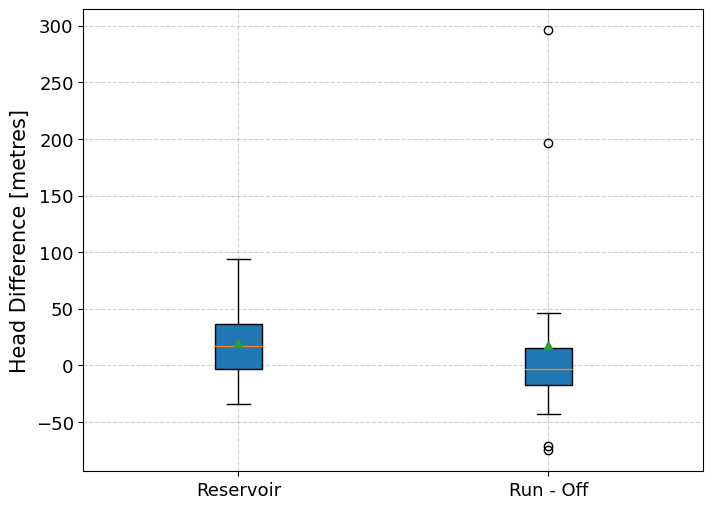


Reservoir - Optimal Buffer:  0.003368421052631579
Mean Absolute Error:  27.5203125
Standard Deviation:  29.63352908222265

Run - Off - Optimal Buffer:  0.0028947368421052633
Mean Absolute Error:  46.15
Standard Deviation:  85.52585020116186


In [91]:
import numpy as np
import pandas as pd
import rasterio
from shapely.geometry import Point
from pyproj import CRS, Proj
import geopandas as gpd
import matplotlib.pyplot as plt

wgs84 = CRS("EPSG:4326")
merc = CRS("EPSG:3395")
merc_pro = Proj("EPSG:3395")

class LocalHydroNetwork:
    def __init__(self, dem_path, flow_path, flow_acc_path):
        self.dem = rasterio.open(dem_path)
        self.flow = rasterio.open(flow_path)
        self.flow_acc = rasterio.open(flow_acc_path)

    def create_local_network(self, point, buffer=0.005):
        minx, miny = point.x - buffer, point.y - buffer
        maxx, maxy = point.x + buffer, point.y + buffer

        window = rasterio.windows.from_bounds(minx, miny, maxx, maxy, self.dem.transform)
        dem_local = self.dem.read(1, window=window)
        flow_local = self.flow.read(1, window=window)
        flow_acc_local = self.flow_acc.read(1, window=window)

        transform = rasterio.windows.transform(window, self.dem.transform)

        nodes, arcs = self._extract_nodes_arcs(dem_local, flow_local, flow_acc_local, transform)
        return nodes, arcs

    def _extract_nodes_arcs(self, dem_local, flow_local, flow_acc_local, transform):
        nodes = []
        arcs = []
        height, width = dem_local.shape
        node_index_map = {}

        for i in range(height):
            for j in range(width):
                x, y = transform * (j, i)
                elevation = dem_local[i, j]
                flow_dir = flow_local[i, j]
                flow_acc = flow_acc_local[i, j]

                current_node = (i, j)
                if current_node not in node_index_map:
                    node_id = len(nodes)
                    node = {
                        'id': node_id,
                        'x': x,
                        'y': y,
                        'elevation': elevation,
                        'flow_acc': flow_acc,
                        'arcs': []
                    }
                    nodes.append(node)
                    node_index_map[current_node] = node_id
                else:
                    node_id = node_index_map[current_node]

                if flow_dir > 0:
                    next_i, next_j = self._flow_direction_to_indices(i, j, flow_dir)
                    if 0 <= next_i < height and 0 <= next_j < width:
                        next_node = (next_i, next_j)
                        if next_node not in node_index_map:
                            next_node_id = len(nodes)
                            next_x, next_y = transform * (next_j, next_i)
                            next_elevation = dem_local[next_i, next_j]
                            next_flow_acc = flow_acc_local[next_i, next_j]

                            next_node_data = {
                                'id': next_node_id,
                                'x': next_x,
                                'y': next_y,
                                'elevation': next_elevation,
                                'flow_acc': next_flow_acc,
                                'arcs': []
                            }
                            nodes.append(next_node_data)
                            node_index_map[next_node] = next_node_id
                        else:
                            next_node_id = node_index_map[next_node]

                        arc = {
                            'start_node': node_id,
                            'end_node': next_node_id,
                            'length': np.hypot(next_i - i, next_j - j)
                        }
                        nodes[node_id]['arcs'].append(arc)
                        arcs.append(arc)

        return nodes, arcs

    def _flow_direction_to_indices(self, i, j, direction):
        if direction == 1:  # East
            return i, j + 1
        elif direction == 2:  # Southeast
            return i + 1, j + 1
        elif direction == 4:  # South
            return i + 1, j
        elif direction == 8:  # Southwest
            return i + 1, j - 1
        elif direction == 16:  # West
            return i, j - 1
        elif direction == 32:  # Northwest
            return i - 1, j - 1
        elif direction == 64:  # North
            return i - 1, j
        elif direction == 128:  # Northeast
            return i - 1, j + 1
        else:
            return i, j  # No direction

    def calculate_head(self, nodes, arcs):
        max_head = 0
        for arc in arcs:
            start_node = nodes[arc['start_node']]
            end_node = nodes[arc['end_node']]
            head = start_node['elevation'] - end_node['elevation']
            if head > max_head:
                max_head = head
        return max_head

    def process_hydropower_plants(self, df, buffer):
        df['head_calculated'] = pd.NA
        for index, row in df.iterrows():
            point = Point(row['Longitude'], row['Latitude'])
            nodes, arcs = self.create_local_network(point, buffer)
            head = self.calculate_head(nodes, arcs)
            df.at[index, 'head_calculated'] = head
        df['head_difference'] = df['head'] - df['head_calculated']
        return df

    def optimize_buffer(self, df, buffer_range):
        best_mae = float('inf')
        best_std = float('inf')
        best_buffer = None
        best_df = None
        
        for buffer in buffer_range:
            df_processed = self.process_hydropower_plants(df.copy(), buffer)
            mae = df_processed['head_difference'].abs().mean()
            std = df_processed['head_difference'].std()
            if mae + std < best_mae + best_std:
                best_mae = mae
                best_std = std
                best_buffer = buffer
                best_df = df_processed
        
        print(f"Optimal Buffer: {best_buffer}")
        print(f"Mean Absolute Error: {best_mae}")
        print(f"Standard Deviation: {best_std}")
        
        return best_df, best_buffer, best_mae, best_std

    def optimize_for_fuel_types(self, df, buffer_range):
        reservoir_df = df[df['Fuel Type'] == 'Reservoir'].copy()
        runoff_df = df[df['Fuel Type'] == 'Run - Off'].copy()

        print("\nOptimizing for Reservoir plants...")
        optimized_reservoir_df, optimal_reservoir_buffer, reservoir_mae, reservoir_std = self.optimize_buffer(reservoir_df, buffer_range)
        
        print("\nOptimizing for Run - Off plants...")
        optimized_runoff_df, optimal_runoff_buffer, runoff_mae, runoff_std = self.optimize_buffer(runoff_df, buffer_range)

        return {
            'reservoir': {
                'df': optimized_reservoir_df, 
                'buffer': optimal_reservoir_buffer, 
                'mae': reservoir_mae, 
                'std': reservoir_std
            },
            'runoff': {
                'df': optimized_runoff_df, 
                'buffer': optimal_runoff_buffer, 
                'mae': runoff_mae, 
                'std': runoff_std
            }
        }

# Plotting function for boxplot
def plot_head_difference_boxplots(reservoir_df, runoff_df):
    reservoir_head_diff = reservoir_df['head_difference'].dropna()
    runoff_head_diff = runoff_df['head_difference'].dropna()

    if not reservoir_head_diff.empty and not runoff_head_diff.empty:
        plt.figure(figsize=(8, 6))
        plt.boxplot([reservoir_head_diff, runoff_head_diff], 
                    labels=['Reservoir', 'Run - Off'], 
                    patch_artist=True, 
                    showmeans=True)
        plt.ylabel('Head Difference [metres]', fontsize=15)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("No data available for plotting.")

# Example usage
buffer_range = np.linspace(0.001, 0.01, 20)
hydro_network = LocalHydroNetwork(dem_path, flow_path, flow_acc_path)

# Load your hydropower plant data
df = pd.read_excel(xlsx_file)
df = df.dropna(subset=['head'])

# Optimize buffer separately for Reservoir and Run-Off
results = hydro_network.optimize_for_fuel_types(df, buffer_range)

# Access the optimized DataFrames
optimized_reservoir_df = results['reservoir']['df']
optimized_runoff_df = results['runoff']['df']

# Plot the boxplots
plot_head_difference_boxplots(optimized_reservoir_df, optimized_runoff_df)

# Print results for Reservoir
print("\nReservoir - Optimal Buffer: ", results['reservoir']['buffer'])
print("Mean Absolute Error: ", results['reservoir']['mae'])
print("Standard Deviation: ", results['reservoir']['std'])

# Print results for Run-Off
print("\nRun - Off - Optimal Buffer: ", results['runoff']['buffer'])
print("Mean Absolute Error: ", results['runoff']['mae'])
print("Standard Deviation: ", results['runoff']['std'])


In [88]:
optimized_runoff_df

,SNo,Status,Fuel Type,Latitude,Longitude,capacity,Expected Generation (GWh),total theoretical possible generation (local) GWh,COD,head,head_calculated,head_difference
1,2,Existing,Run - Off,15.491752,106.278715,45.00,180.00,394.200,1991.0,10.0,32,-22.0
6,7,Existing,Run - Off,15.403767,106.280347,76.00,309.00,665.760,2009.0,12.0,18,-6.0
11,12,Existing,Run - Off,18.798566,102.426838,6.00,25.00,52.560,2012.0,21.0,22,-1.0
14,16,Existing,Run - Off,15.134441,106.678223,14.80,101.00,129.648,2013.0,75.0,30,45.0
17,19,Existing,Run - Off,19.211544,102.329586,14.00,49.60,122.640,2014.0,7.0,82,-75.0
31,36,Existing,Run - Off,19.212686,103.374882,14.55,33.07,127.458,2017.0,356.0,60,296.0
33,38,Existing,Run - Off,20.181548,101.923022,14.50,62.59,127.020,2017.0,47.0,53,-6.0
40,46,Existing,Run - Off,15.575719,106.222823,15.00,60.00,131.400,2018.0,64.0,18,46.0
43,50,Existing,Run - Off,18.619253,102.387400,64.00,265.00,566.772,2019.0,39.5,56,-16.5
45,52,Existing,Run - Off,18.648161,103.571726,18.00,105.00,157.680,2019.0,43.0,15,28.0
